##### Contenido proveído bajo licencia Creative Commons Attribution, CC-BY 4.0. (c)2015 O. Skurtys y C. Cooper. Adaptado de JITcode-Mech, de L. Barba (CC-BY 4.0).

# Introducción a Python, sesión 2

# Contexto -- Posición de una turbina eólica

![image](http://energy.gov/sites/prod/files/styles/borealis_photo_gallery_large_respondxl/public/windTurbineLabels.png?itok=TiZTB4yO)

Estamos buscando la mejor ubicación para instalar una granja eólica a partir de data de la velocidad del viento en tres puntos específicos.

Los principales criterios para tener en consideración son:

* **Velocidad promedio del viento**: mientras más alto, más energía podemos extraer.
* **Velocidad mínima del viento**: el controlador no soltará el freno de las aspas a menos que la velocidad del viento sea mayor a 8 mph (~3.6 m/s).
* **Velocidad máxima del viento**: por motivos de seguridad, el controlador frena las aspas cuando la velocidad pasa cierto umbral, en este caso, 55 mph (~25 m/s).

### Potencial problema
Las mediciones de velocidad de viento para cada una de las tres locaciones están en los archivos `site1ms.csv`, `site2mph.csv` y `site3knot.csv`. Lamentablemente, las mediciones fueron hechas por diferentes personas y en diferentes unidades: metros por segundo, millas por hora y nudos, respectivamente. Considerando que estamos más acostumbrados a trabajar en metros por segundo, vamos a necesitar una función que transforme de millas por hora y nudos a metros por segundo. Los factores de conversión son:

$$1 \rm{mph} = .447 \rm{m/s}$$
$$1 \rm{nudos} = .514 \rm{m/s}$$


Generar una función en Python es muy simple. Se define usando `def`, el nombre de la función, y sus variables de entrada, y lo que sea que devuelva se pone junto a la palabra `return`. Por ejemplo, la siguiente función hace el cambio de unidades de millas por hora a metros por segundo:

Este segundo notebook de la primera sesión va a introducir el uso de funciones y graficar con **Matplotlib**. Vamos a usar ambos conceptos repetidamente en el semestre, así es que asegúrense de entender bien lo que vamos a ver a continuación.

In [5]:
def mph_to_ms(speed):
    return speed*.447

### ALUMNO
def knot_to_ms(speed):
    return speed*.514
#Hacer función para pasar de nudos a metros por segundo
####

Hagan ustedes ahora una función para pasar de nudos a metros por segundo. La necesitarán después!

Probemos la función `mph_to_ms`:

In [6]:
mph_to_ms(8)

3.576

Se acuerdan de `numpy`? Nos permitía operar sobre arreglos. Intentemos usar la función con un arreglo de `numpy`: 

In [12]:
import numpy

vel = numpy.arange(5, 15, 2)

vel_ms = mph_to_ms(vel)

for i in range(len(vel)):
    print ('%1.3f mph son %1.3f m/s'%(vel[i], vel_ms[i]))


5.000 mph son 2.235 m/s
7.000 mph son 3.129 m/s
9.000 mph son 4.023 m/s
11.000 mph son 4.917 m/s
13.000 mph son 5.811 m/s


## Trabajando con archivos
Las mediciones están disponibles en los archivos `site1ms.csv`, `site2mph.csv` y `site3knot.csv`. Afortunadamente el nombre de los archivos dice explícitamente las unidades en que está la data, pero ¿como le decimos a Python la transformación que debe hacer?

La forma más fácil es usando `in`. `in` compara dos palabras, y ve si una está contenida en la otra. Por ejemplo

In [13]:
'gol' in 'otorrinolaringologo'

True

Ve si la palabra `gol` está contenida en la palabra `otorrinolaringologo`, lo cual es cierto. 

Ahora, debemos comparar los nombres de los archivos con `ms`, `mph` y `knot`, y sabremos en qué unidades están. Para iterar sobre los archivos, podemos usar `glob`:

In [14]:
import glob
archivos = glob.glob('*.csv')
print (archivos)

['site1ms.csv', 'site2mph.csv', 'site3knot.csv']


que nos entrega una lista con los archivos `.csv` disponibles.

Los archivos contienen mediciones diarias entre el 1 de enero del 2012 y el 31 de diciembre del 2013. Si abren los archivos en un editor de texto, verán que la data está dispuesta en tres columnas, separados por una coma (csv = comma separated values). La primera fila no es más que el nombre de las columnas: 

* AWND - Average daily wind speed (Velocidad promedio diaria)
* WSF2 - Fastest 2-minute wind speed (Velocidad máxima que duró 2 minutos)
* WSF5 - Fastest 5-second wind speed  (Velocidad máxima que duró 5 segundos)

Para importar la data a un arreglo de `numpy` podemos usar [`loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). La siguiente función va a tomar un archivo, leer la data y convertir las unidades (si es necesario).

In [33]:
def check_and_convert(fname):
    if 'mph' in fname:
        speeddata = numpy.loadtxt(fname,delimiter=',', skiprows=1)
        print ("Converting from mph to ms")
        
        return mph_to_ms(speeddata)
    
    if 'knot' in fname:
        speeddata = numpy.loadtxt(fname,delimiter=',', skiprows=1)
        print ("Converting from knot to ms")
        return knot_to_ms(speeddata)
    
    if 'ms' in fname:
        speeddata = numpy.loadtxt(fname,delimiter=',', skiprows=1)
        print ("No conversion needed")
        return speeddata


In [46]:
loc_1 = check_and_convert(archivos[0])
loc_2 = check_and_convert(archivos[1])
loc_3 = check_and_convert(archivos[2])
loc_1

No conversion needed
Converting from mph to ms
Converting from knot to ms


array([[ 6.8, 17. , 21. ],
       [ 3.6,  7.6, 10.3],
       [ 5.4, 11.2, 14.3],
       ...,
       [ 7.7, 14.3, 17.9],
       [ 2.9,  7.2,  9.8],
       [ 5.6, 12.5, 16.1]])

Listo, las mediciones de la locación 1 están en el arreglo `loc_1`, y los de la locación 2 en `loc_2`. Falta la locación 3: acuérdense de hacer la función para convertir de nudos a metros por segundo.

Miremos la forma de esos arreglos:  

In [21]:
print (loc_1.shape)

(731, 3)


Data para 731 días en 3 columnas (AWND, WSF2, WSF5)!

## A graficar!

En Python, la libraría más popular para graficar es **Matplotlib**. En un código Python común, sus principales funcionalidades se importan así:

```Python
import matplotlib.pyplot as plt
```

Acuérdense de la función de `as`: es solamente para ahorrar tiempo!

En estos IPython notebooks, debemos ser un poco más cuidadosos. Si queremos que los gráficos aparezcan en el notebook, debemos agregar:

```Python
%matplotlib inline
```

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

Partamos por graficar la velocidad promedio en las locaciones 1 y 2 (primera columna)

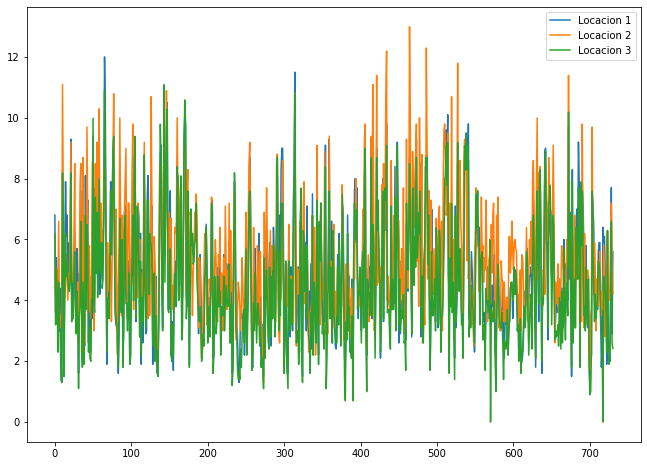

In [41]:
plt.figure(figsize=(11,8))
plt.plot(loc_1[:,0]);
plt.plot(loc_2[:,0]);
plt.plot(loc_3[:,0]);
plt.legend(["Locacion 1","Locacion 2","Locacion 3"])


Tenemos un gráfico! Pero es bien poco lo que se puede ver. 

Para suavizar la data, podemos usar un promedio móvil. Un promedio móvil de $N$ datos con una ventana $n$ toma los $n$ datos más cercanos a $i$ y los promedia:

$$
\overline{u}_i = \frac{1}{n}\sum_{j=i-n/2}^{i+n/2-1} u_j
$$

¿Qué pasa si $i<n/2$ o $i>N-n/2$ y no puedo hacer la suma? ¡Tomen los valores que puedan! Por ejemplo, si la ventana es de 30 datos $(n=30)$, el promedio móvil en $i=3$ tomará los datos desde $i=0$ hasta $i=18$.

Ahora, tendrán que trabajar un poco. Con lo aprendido hasta ahora, generen una función que calcule el promedio móvil de la velocidad promedio en las tres locaciones, usando una ventana de 30 días, y comparen en un gráfico.

In [59]:
#### Alumno
# Hacer una función que calcule la media móvil y graficar
def media_movil(datos,ventana):
    N = len(datos[:,0])
    n = ventana
    ctdor= 0
    lista= datos[:,0]
    for i in range(N):
        if 14<i<(N-15):
            lista += sum(datos[i-n/2:i+n/2,0]) 
            for j in range(n):
                suma += datos[i,j]
            lista += suma
    return lista
  

In [65]:
lista = loc_1[2:4,0]
lista


array([5.4, 4.2])

¿Ven que la data es muchísimo más suave, y más legible? Prueben que pasa si usan ventanas más grandes o pequeñas. ¿Cuál locación es mejor para poner la granja eólica?


## Condiciones de operación
A pesar que con la velocidad promedio es un parámetro importante a considerar, sabemos que no es el único. Dijimos anteriormente que el sistema de seguridad frenaría las aspas en caso de que la velocidad pasara cierto umbral, lo cual limita el factor de planta.

Usando la velocidad máxima de dos minutos de duración, escriban una función que cuente la cantidad de días en que la granja se detendría en cada locación. Luego, grafiquen la velocidad y sobrepongan una línea que indique el umbral.

Para estar seguros, queremos tener la misma información para la velocidad máxima de cinco segundos de duración.    



In [ ]:
###ALUMNO
# Hacer función que cuente el número de días que pasa el máximo para 2 minutos y 5 segundos
# y representenlo en un gráfico
####

¿Qué locación es más apropiada para instalar una granja eólica?